# LoanTap Logistic Regression

## Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

## Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear and Logistic regression library
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc
#stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# hypothesis testing library
from scipy.stats import shapiro

# math library
import math 

# target encoder
from  category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder

# date
from datetime import date

#PCA
from sklearn.decomposition import PCA

#SMOTE - Balancing data
from imblearn.over_sampling import SMOTE

In [50]:
# load Jamboree education data
original = pd.read_csv(r'D:\PY\course\course material\Module 13 - Intro to ML and NN\Business Case LoanTap Logistic Regression\logistic_regression.csv')

In [51]:
df = original.copy()

## Target /  dependent feature - 'loan_status'

In [52]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [53]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [54]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [55]:
df[:2].T

,0,1
loan_amnt,10000.0,8000.0
term,36 months,36 months
int_rate,11.44,11.99
installment,329.48,265.68
grade,B,B
sub_grade,B4,B5
emp_title,Marketing,Credit analyst
emp_length,10+ years,4 years
home_ownership,RENT,MORTGAGE
annual_inc,117000.0,65000.0


### Null values are present in below mentioned columns
    'emp_title', 'emp_length', 'title', 'revol_util', 'mort_acc', 'pub_rec_bankruptcies'

In [56]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

#### Data are present in different scale, need to normalize the data before Logistic Regression

In [57]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### There are 27 columns, Where most datatype are Float64 and Object. 
    - Data type change is required
    - 396030 records are availalbe in data

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Missing value treatment for below columns -  replace by mean value
 - 'emp_length','revol_util','mort_acc','pub_rec_bankruptcies'

In [59]:
df1 = df.copy()

In [60]:
df1[['emp_length','revol_util','mort_acc','pub_rec_bankruptcies']].isna().sum()

emp_length              18301
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [61]:
column = ['revol_util','mort_acc','pub_rec_bankruptcies']
for i in column:
    mean = df1[i].mean()
    df1[i].fillna(value = mean,  inplace=True)

In [62]:
df1['emp_length'].fillna(value = df1['emp_length'].mode()[0],  inplace=True)
df1['title'].fillna(value = 'unknown',  inplace=True)
df1['emp_title'].fillna(value = 'unknown',  inplace=True)

## Outlier treatment
     - Data as outlier, outlier to be removed by converting all outlier data with IQR range.

In [63]:
df2 = df1.copy()

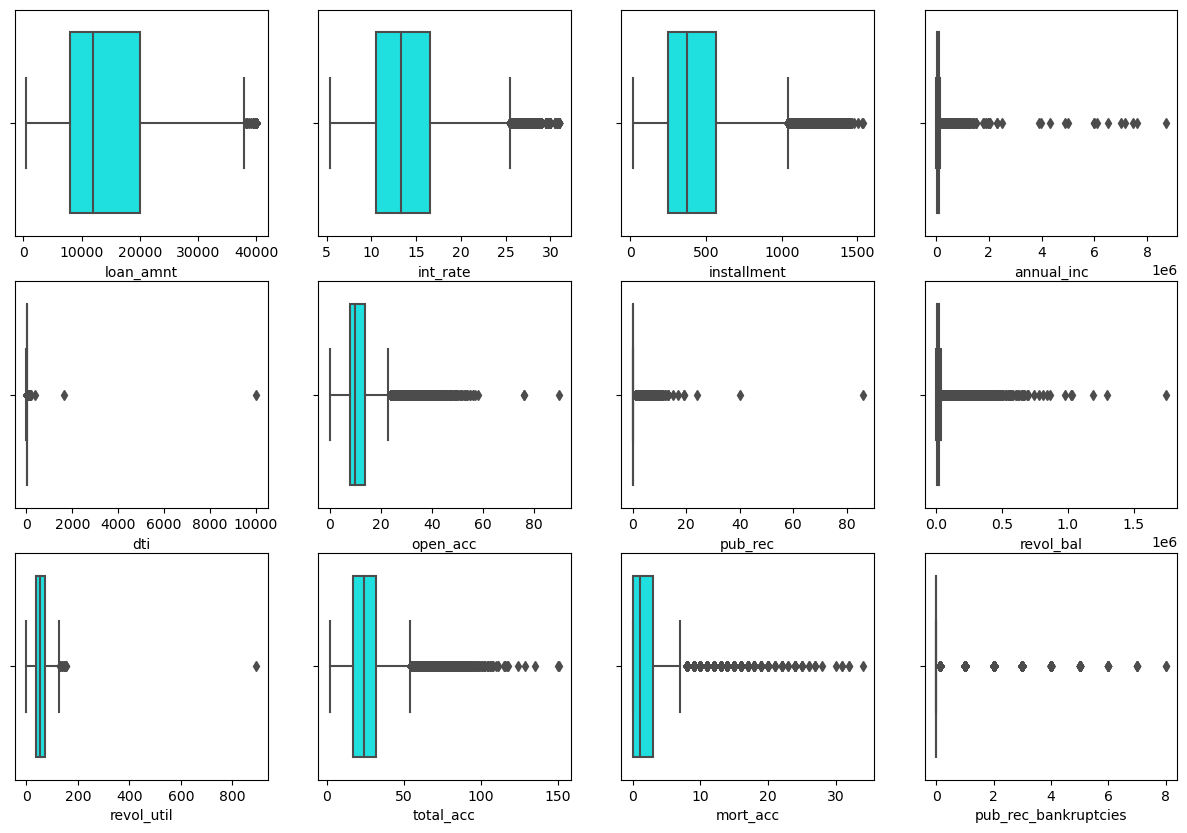

In [64]:
col = df2.columns[df2.dtypes == 'float64']
fig, ax = plt.subplots(3,4, figsize = (15,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(ax = ax[i,j], x = df2[col[c]], color = 'cyan')
        c = c+1

In [65]:
# converting all outlier to upper limit
col = df2.columns[df2.dtypes == 'float64']

for i in col:
    Q1=df2[i].quantile(0.25)
    Q3=df2[i].quantile(0.75)
    iqr = Q3-Q1
    Upper_Whisker = Q3+1.5*iqr
    df2.loc[df2[i] > Upper_Whisker,i] = Upper_Whisker

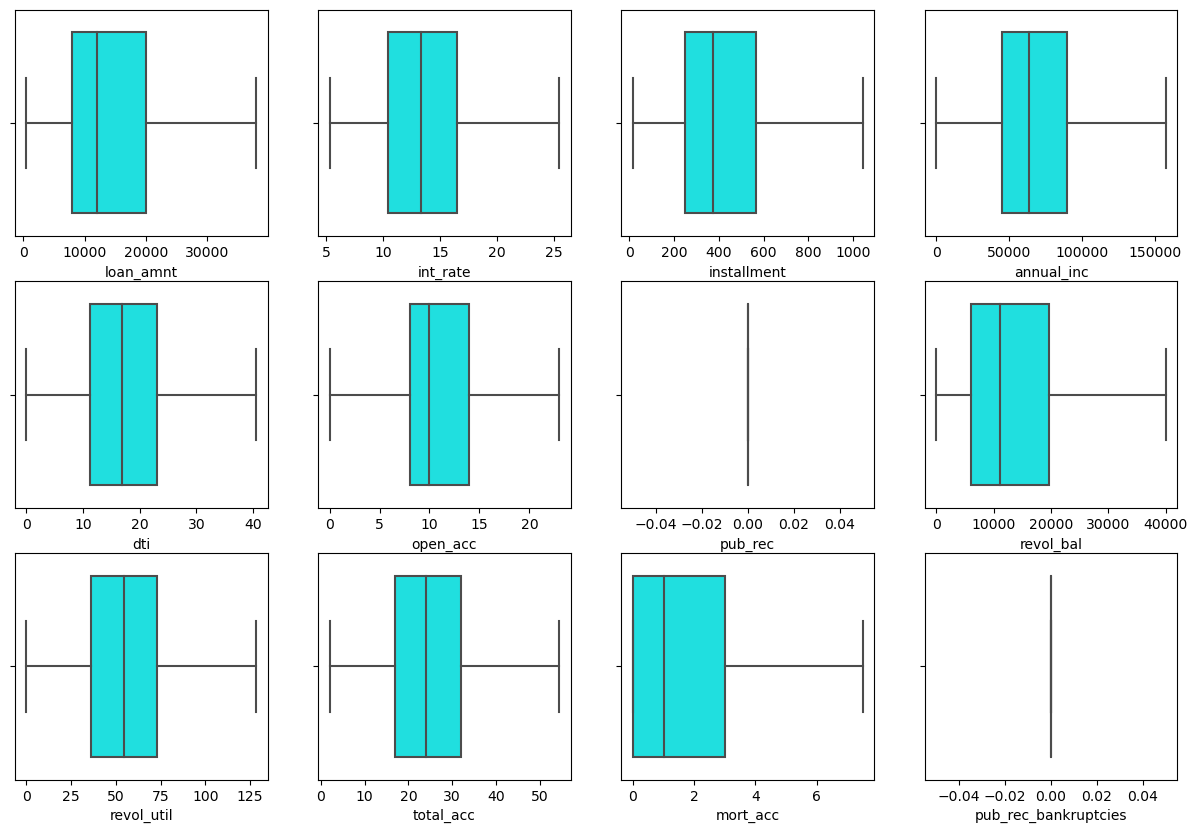

In [66]:
col = df2.columns[df2.dtypes == 'float64']
fig, ax = plt.subplots(3,4, figsize = (15,10))
c = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(ax = ax[i,j], x = df2[col[c]], color = 'cyan')
        c = c+1

## Encoding of column from string to numeric
     - home_ownership
     - verification_status
     - loan_status
     - purpose
     - application_type
     - grade
     - sub_grade
     - initial_list_status

In [67]:
df3 = df2.copy()

In [68]:
df3['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [69]:
df3['loan_status'] = df3['loan_status'].map({'Fully Paid':0, 'Charged Off':1})

In [70]:
# Target encoding of below 4 columns
cols= ['home_ownership','verification_status', 'purpose', 'application_type','grade','sub_grade','initial_list_status','emp_title', 'title']
for i in cols:
    te = TargetEncoder()
    df3[i] = df3[i].astype('category')
    df3[i] = te.fit_transform(X = df3[i], y = df3['loan_status'])

### Extracting only number from object
    - term
    - emp_length            

In [71]:
df3['term'] = df3['term'].map({' 36 months':36, ' 60 months': 60})

In [72]:
di = {'10+ years' : 10.5, '4 years' : 4, '< 1 year' : 0.5, '6 years': 6, '9 years' : 9, '2 years' : 2, '3 years' : 3, '8 years' : 8, '7 years' : 7, '5 years' : 5, '1 year' : 1}
df3['emp_length'] = df3['emp_length'].map(di)
df3['emp_length'] .unique()

array([10.5,  4. ,  0.5,  6. ,  9. ,  2. ,  3. ,  8. ,  7. ,  5. ,  1. ])

### Feature engineering for date column -> current date - given date in years

In [73]:
df3['issue_d'] = pd.to_datetime(df3['issue_d'], format='%b-%Y') 
df3['issue_d_diff'] = date.today().year - df3['issue_d'].dt.year 

In [74]:
df3['earliest_cr_line'] = pd.to_datetime(df3['earliest_cr_line'], format='%b-%Y') 
df3['earliest_cr_line_diff'] = date.today().year - df3['earliest_cr_line'].dt.year 

### Drop columns which are not related to Target column
    - issue_d -> feature engineering done for this column
    - earliest_cr_line -> feature engineering done for this column
    - address -> wont impact target column

In [75]:
ncols = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
        'emp_length', 'home_ownership', 'annual_inc',
       'verification_status',  'loan_status', 'purpose',
       'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_d_diff',
       'earliest_cr_line_diff','emp_title','title']

df4 = df3[ncols]

## --------------------------------------------------------------------------------------------------

## Univarient analysis

In [76]:
col = df.columns
for i in col:
    print('Unique values of',i, 'column =', df1[i].nunique())
   
    print('-----------------------------------------------')

Unique values of loan_amnt column = 1397
-----------------------------------------------
Unique values of term column = 2
-----------------------------------------------
Unique values of int_rate column = 566
-----------------------------------------------
Unique values of installment column = 55706
-----------------------------------------------
Unique values of grade column = 7
-----------------------------------------------
Unique values of sub_grade column = 35
-----------------------------------------------
Unique values of emp_title column = 173106
-----------------------------------------------
Unique values of emp_length column = 11
-----------------------------------------------
Unique values of home_ownership column = 6
-----------------------------------------------
Unique values of annual_inc column = 27197
-----------------------------------------------
Unique values of verification_status column = 3
-----------------------------------------------
Unique values of issue_d 

## Unique value counts


In [77]:
col = df.columns
for i in col:
    print('Unique values of',i, 'column')
    print((df1[i].value_counts().head(3)/df.shape[0]) * 100)
    print('-----------------------------------------------')

Unique values of loan_amnt column
10000.0    6.986339
12000.0    5.395046
15000.0    5.025629
Name: loan_amnt, dtype: float64
-----------------------------------------------
Unique values of term column
 36 months    76.258112
 60 months    23.741888
Name: term, dtype: float64
-----------------------------------------------
Unique values of int_rate column
10.99    3.133853
12.99    2.432139
15.61    2.360932
Name: int_rate, dtype: float64
-----------------------------------------------
Unique values of installment column
327.34    0.244426
332.10    0.199732
491.01    0.185845
Name: installment, dtype: float64
-----------------------------------------------
Unique values of grade column
B    29.295255
C    26.762366
A    16.207611
Name: grade, dtype: float64
-----------------------------------------------
Unique values of sub_grade column
B3    6.730551
B4    6.464409
C1    5.974800
Name: sub_grade, dtype: float64
-----------------------------------------------
Unique values of emp_ti

## Histogram

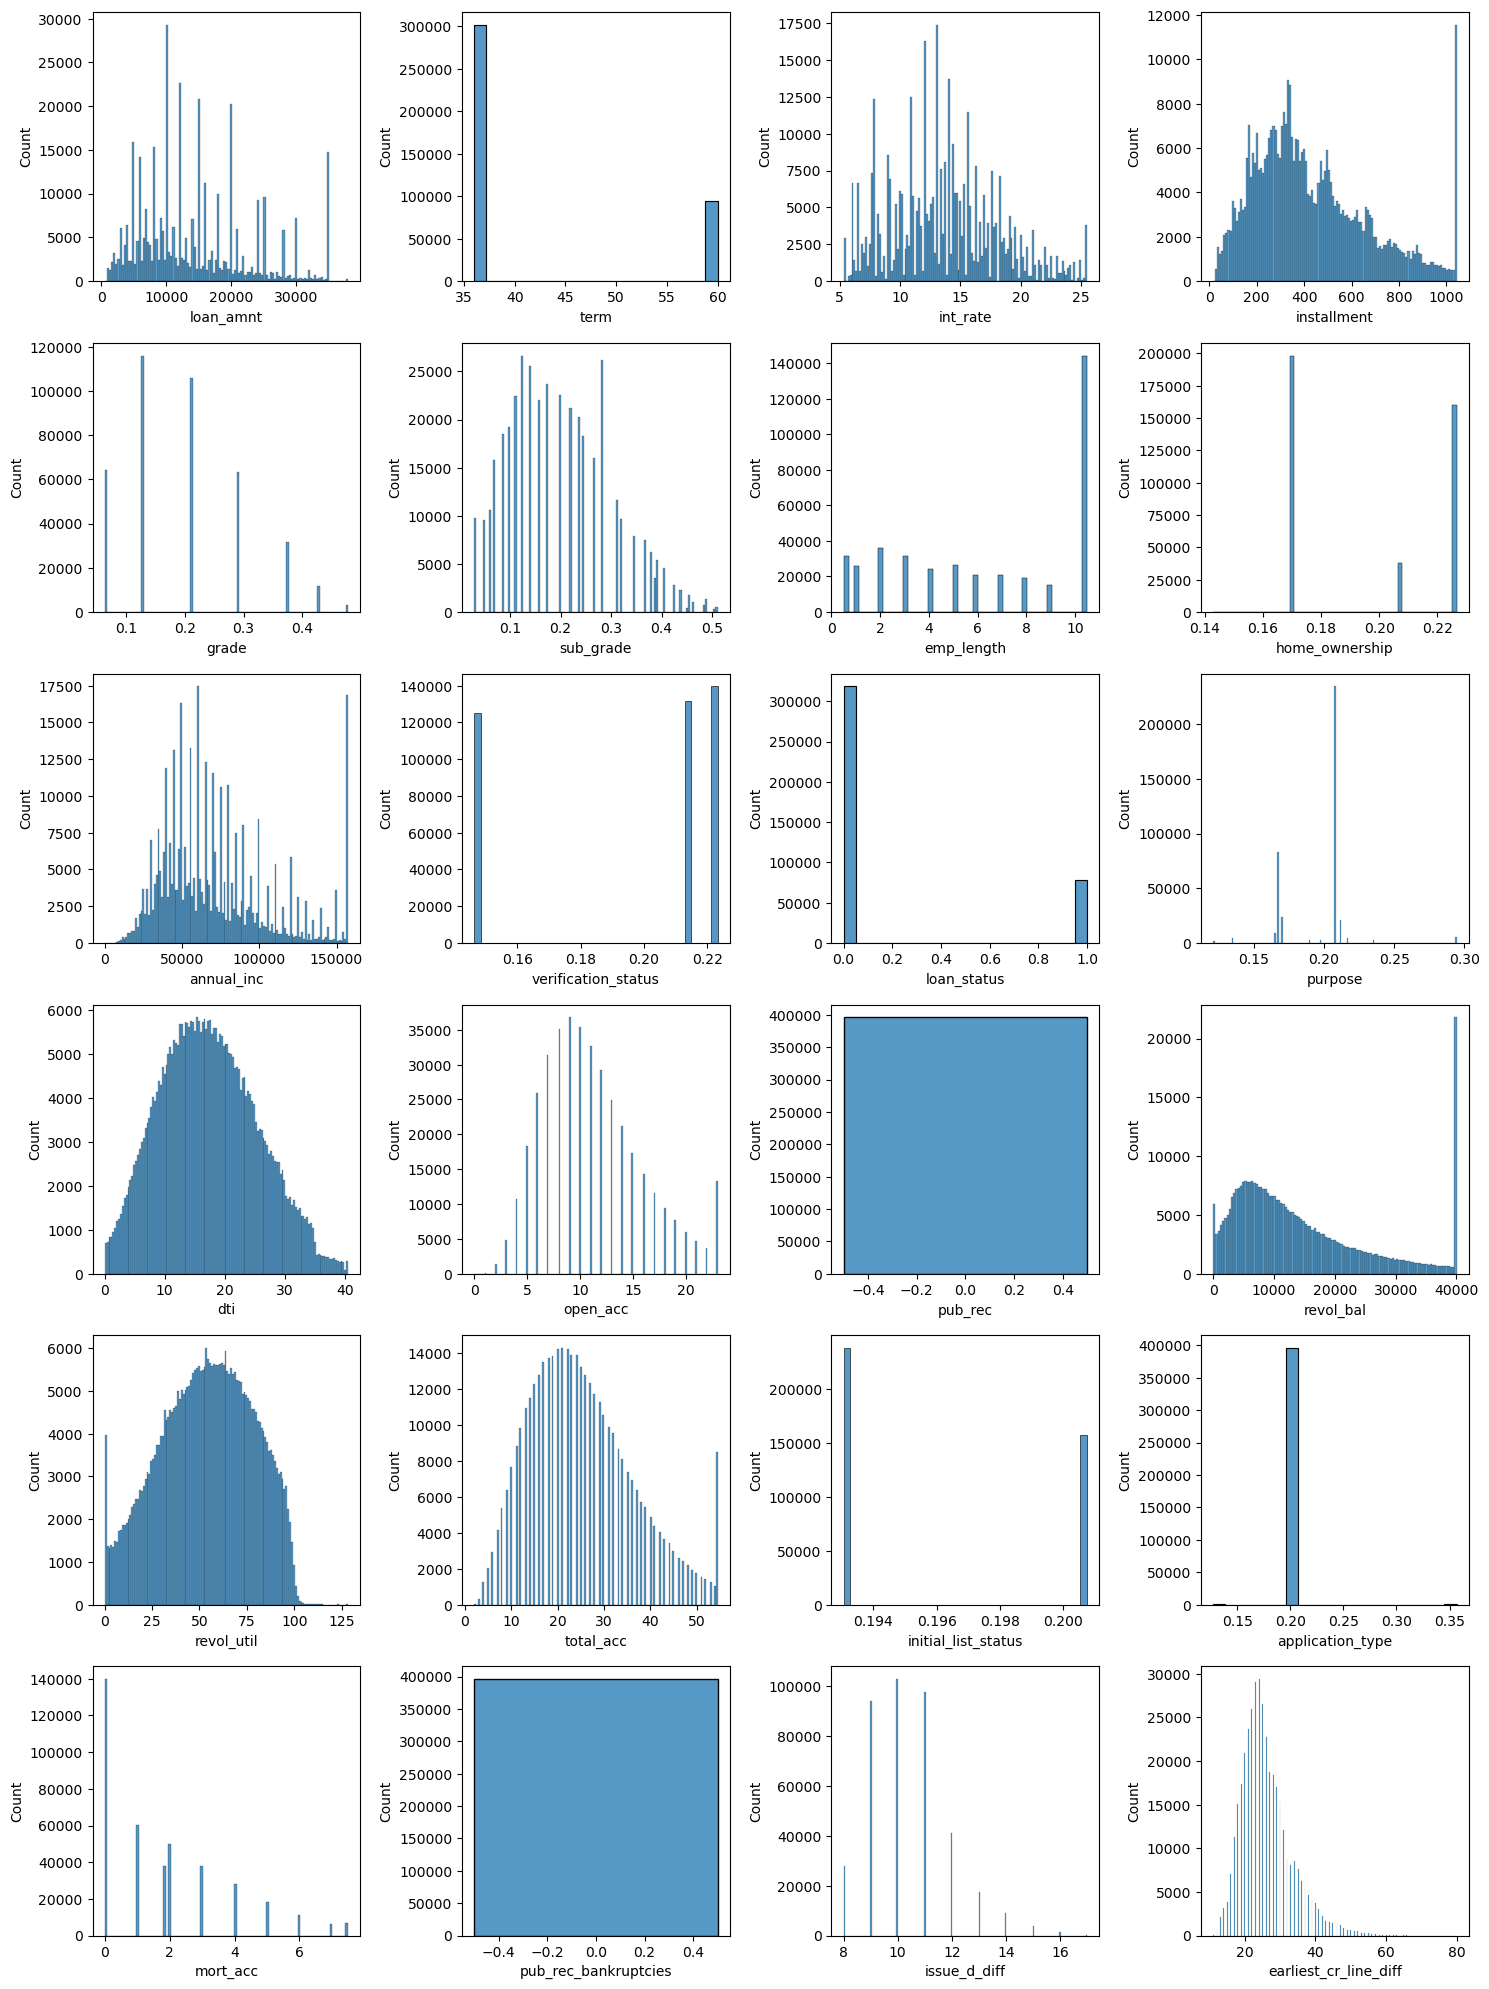

In [80]:
col = df4.columns
fig, ax = plt.subplots(6,4, figsize = (15,20))
c = 0
for i in range(6):
    for j in range(4):
        sns.histplot(ax = ax[i,j], x = df4[col[c]])
        c = c+1
plt.tight_layout()
plt.show()

## Bivariate Analysis

25


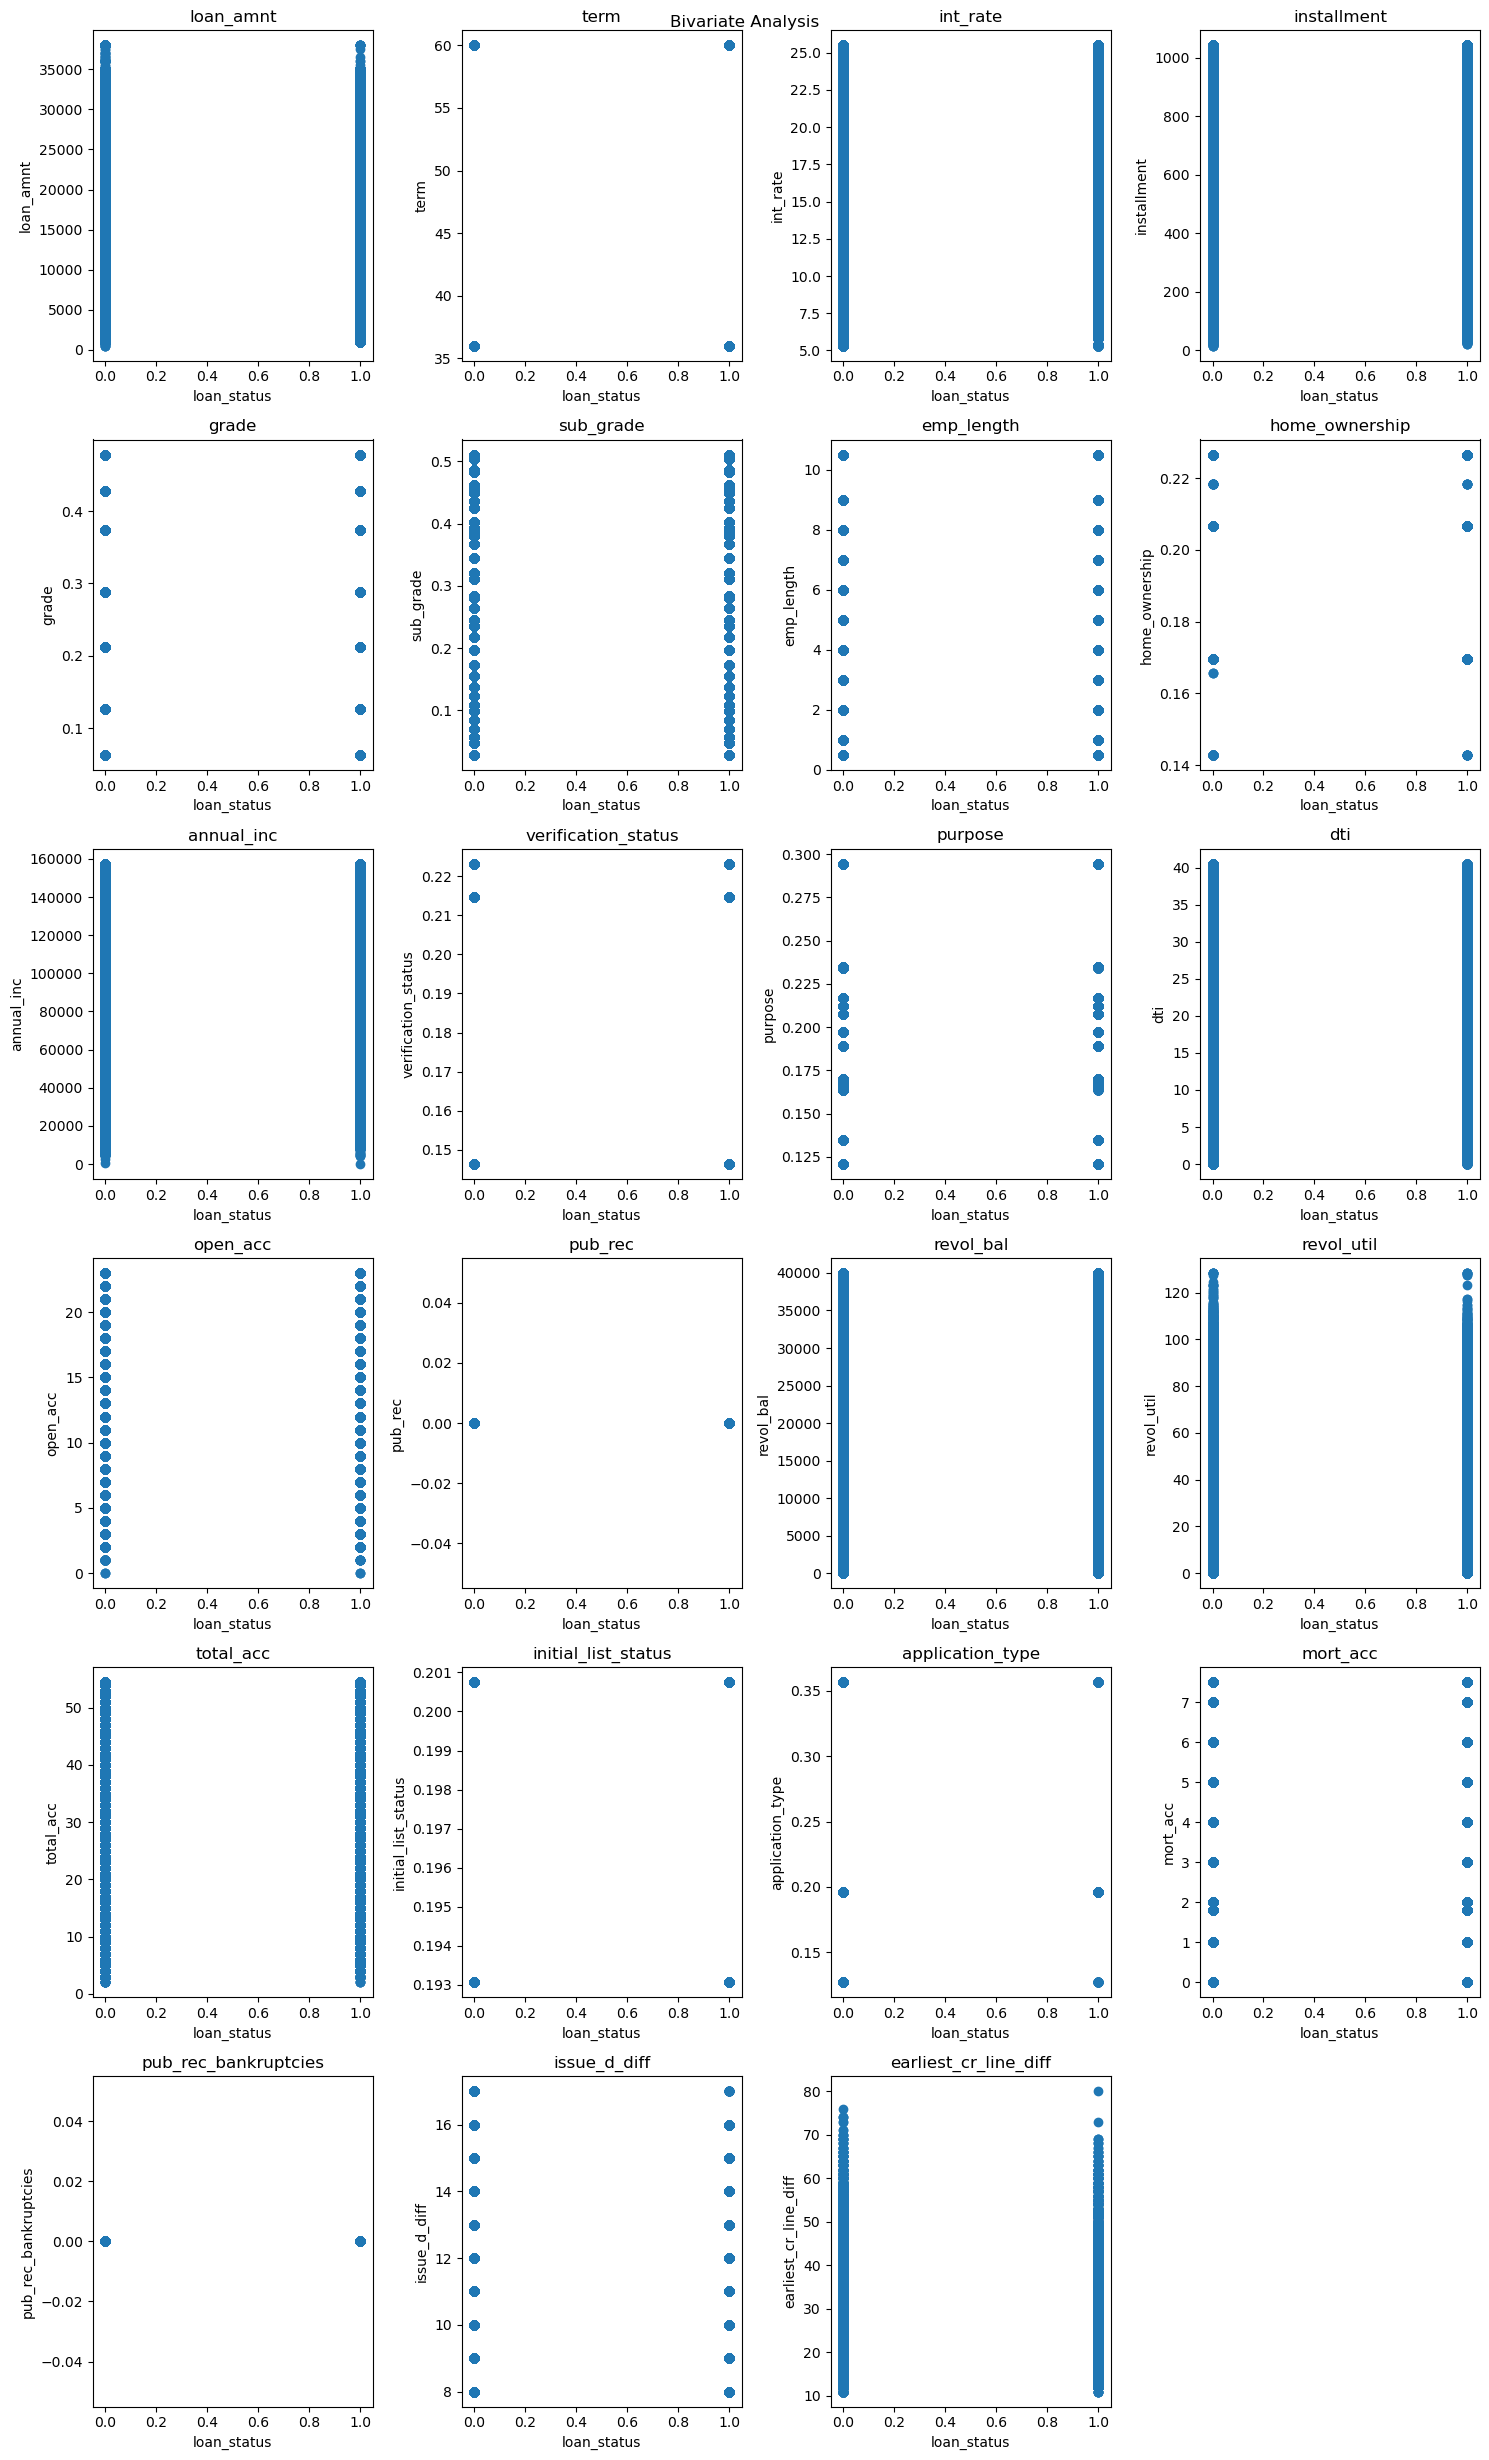

In [82]:
col = df4.columns.drop (['loan_status'])
fig, ax = plt.subplots(6,4, figsize = (15,25))
fig.suptitle('Bivariate Analysis')
#ax[2,1].set_axis_off()
ax[5,3].set_axis_off()
c = 0
print(len(col))
for i in range(6):
    for j in range(4):
        #print( df[col[c]])
        if c == 23:
            break
        ax[i,j].scatter(x = df4['loan_status'], y = df4[col[c]])
        ax[i,j].set_xlabel('loan_status')
        ax[i,j].set_ylabel(col[c])
        ax[i,j].set_title(col[c])
        c = c +1
plt.tight_layout()
plt.show()

#### Bivariate insights :
    - Mort_acc, total_acc, revol_bal as correlation with Loan status column

<Axes: >

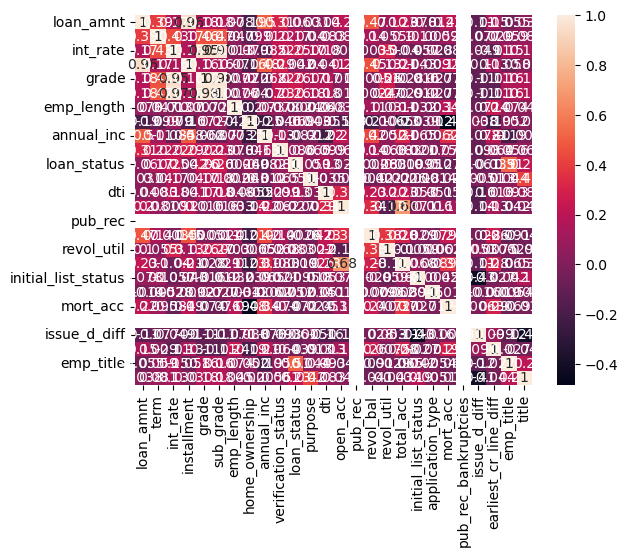

In [78]:
sns.heatmap(df4.corr(method='pearson'), annot=True)

In [79]:
df4.corr(method='pearson').loc['loan_status'].sort_values(ascending = False)

loan_status              1.000000
emp_title                0.508090
sub_grade                0.263801
grade                    0.257886
int_rate                 0.248077
title                    0.225088
term                     0.173246
dti                      0.132507
verification_status      0.085618
revol_util               0.082505
home_ownership           0.068534
loan_amnt                0.059898
purpose                  0.059394
installment              0.042407
open_acc                 0.027475
application_type         0.012268
initial_list_status      0.009489
emp_length              -0.002394
revol_bal               -0.002575
total_acc               -0.018826
earliest_cr_line_diff   -0.038928
issue_d_diff            -0.060502
mort_acc                -0.072250
annual_inc              -0.082195
pub_rec                       NaN
pub_rec_bankruptcies          NaN
Name: loan_status, dtype: float64

#### Heatmap insights :
    - Target variable 'Loan status' as highest positive corelation with sub_grade and lowest negative correlation in mort_acc

## Data visualization
 - Data doesnt have any general trend with lot of misclassification.

In [93]:
# feature reduction to 2 feature by PCA
pca = PCA(n_components = 2)
v = pca.fit_transform(df4)
y = df4['loan_status']

<Axes: >

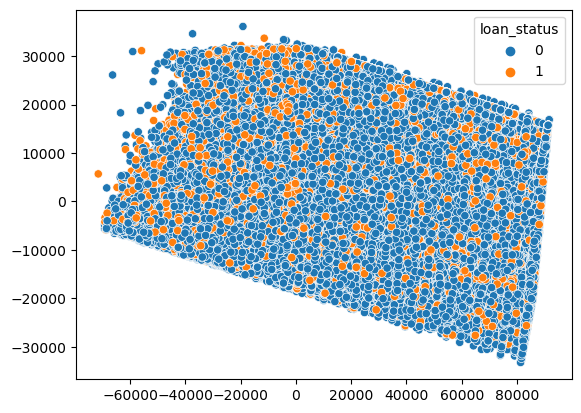

In [95]:
sns.scatterplot(data = v, x = v[:,0], y = v[:,1], hue = y)

## Inbalance check
 - Target column is imbalance with 80 : 20 ratio. Class 0 : 80% data and Class 1 : 20% data
 - With existing condition if we build model then recall score will be low. To improve recall data should be balanced.

<Axes: xlabel='loan_status', ylabel='count'>

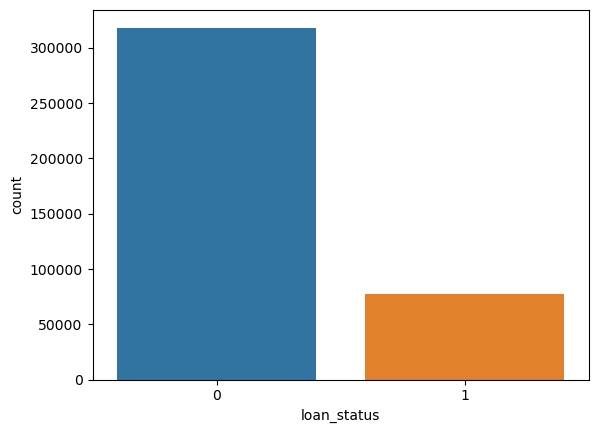

In [87]:
sns.countplot(data = df4, x = 'loan_status')

In [88]:
df4['loan_status'].value_counts(normalize = True)*100

0    80.387092
1    19.612908
Name: loan_status, dtype: float64

In [164]:
df['loan_status'].value_counts()

Fully Paid     318357
Charged Off     77673
Name: loan_status, dtype: int64

## Split data into Train and test
    - Data splited in train and test data. Train is used for assumption check, balancing data, building model and tuning for best lambda and regularization.

In [99]:
X = df4.drop(columns = ['loan_status'])
y = df4['loan_status']

In [157]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print('Train shape',X_train_val.shape, y_train_val.shape)
print('Test shape',X_test.shape, y_test.shape)

Train shape (316824, 25) (316824,)
Test shape (79206, 25) (79206,)


## Logistic regression Assumption checking

In [103]:
col_names = X_train_val.columns

# scale the model for checking assumption
scale = StandardScaler()
data_scale = scale.fit_transform(X_train_val)
X_asm_sc = pd.DataFrame(data_scale, columns = col_names)
y_asm = y

### Multicollinearity check by VIF score
 - As per 1st multicollinearity check, 5 columns as high multicollinearity VIF values.
 - With removal of 'installment', 'sub_grade','grade' these columns, VIF value got reduced below 5.

In [104]:
# create dataframe to VIF values
vif = pd.DataFrame()

# create features column for comparision
vif['Features'] = X_asm_sc.columns

# create VIF values for all independent columns
vif['Vif values'] = [variance_inflation_factor(X_asm_sc.values, i) for i in range(X_asm_sc.shape[1])]

# round values
vif['Vif values'] = round(vif['Vif values'],2)

# sort by values in decending order
vif= vif.sort_values(by ='Vif values', ascending = False )
vif

C:\Users\trtej\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,Vif values
0,loan_amnt,57.01
3,installment,49.27
5,sub_grade,40.33
4,grade,22.59
2,int_rate,19.51
1,term,5.82
16,total_acc,2.38
12,open_acc,2.30
14,revol_bal,2.05
8,annual_inc,1.88


In [105]:
## 2nd Multicollinearity check by removing installment from data
# create dataframe to VIF values
vif = pd.DataFrame()
X_asm_sc_2 = X_asm_sc.drop(columns = ['installment'])
# create features column for comparision
vif['Features'] = X_asm_sc_2.columns

# create VIF values for all independent columns
vif['Vif values'] = [variance_inflation_factor(X_asm_sc_2.values, i) for i in range(X_asm_sc_2.shape[1])]

# round values
vif['Vif values'] = round(vif['Vif values'],2)

# sort by values in decending order
vif= vif.sort_values(by ='Vif values', ascending = False )
vif

C:\Users\trtej\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,Vif values
4,sub_grade,40.33
3,grade,22.59
2,int_rate,18.96
15,total_acc,2.38
11,open_acc,2.29
13,revol_bal,2.05
7,annual_inc,1.88
0,loan_amnt,1.86
18,mort_acc,1.62
20,issue_d_diff,1.60


In [106]:
## 3rd Multicollinearity check by removing installment,sub_grade  from data
# create dataframe to VIF values
vif = pd.DataFrame()
X_asm_sc_3 = X_asm_sc.drop(columns = ['installment', 'sub_grade'])
# create features column for comparision
vif['Features'] = X_asm_sc_3.columns

# create VIF values for all independent columns
vif['Vif values'] = [variance_inflation_factor(X_asm_sc_3.values, i) for i in range(X_asm_sc_3.shape[1])]

# round values
vif['Vif values'] = round(vif['Vif values'],2)

# sort by values in decending order
vif= vif.sort_values(by ='Vif values', ascending = False )
vif

C:\Users\trtej\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,Vif values
2,int_rate,10.97
3,grade,10.90
14,total_acc,2.38
10,open_acc,2.29
12,revol_bal,2.05
6,annual_inc,1.88
0,loan_amnt,1.86
17,mort_acc,1.62
19,issue_d_diff,1.59
22,title,1.58


In [107]:
## 4th Multicollinearity check by removing installment,sub_grade, grade  from data
# create dataframe to VIF values
vif = pd.DataFrame()
X_asm_sc_4 = X_asm_sc.drop(columns = ['installment', 'sub_grade','grade'])
# create features column for comparision
vif['Features'] = X_asm_sc_4.columns

# create VIF values for all independent columns
vif['Vif values'] = [variance_inflation_factor(X_asm_sc_4.values, i) for i in range(X_asm_sc_4.shape[1])]

# round values
vif['Vif values'] = round(vif['Vif values'],2)

# sort by values in decending order
vif= vif.sort_values(by ='Vif values', ascending = False )
vif

C:\Users\trtej\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Features,Vif values
13,total_acc,2.38
9,open_acc,2.29
11,revol_bal,2.05
5,annual_inc,1.88
0,loan_amnt,1.86
16,mort_acc,1.62
2,int_rate,1.61
18,issue_d_diff,1.57
21,title,1.57
12,revol_util,1.55


In [109]:
X_train_val= X_train_val.drop(columns = ['installment', 'sub_grade','grade'])

## balance data using SMOTE technique
 - New points are created using KNN technique to balance data so recall and precision can be balanced.

In [111]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_val, y_train_val)

In [120]:
X_train_val.shape

(316824, 22)

In [118]:
X_res.shape

(509602, 22)

In [119]:
y_res.shape

(509602,)

## ------------------------------------------------------------------------------------------------------

## Split data - Train and validation
    - split train_val data to train and validation data.
    - Train data to build model
    - Validation data to hyper parameter tuning.

In [150]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size = 0.25, random_state = 1)
print('Train shape',X_train.shape, y_train.shape)
print('Val shape',X_val.shape,y_val.shape)


Train shape (382201, 22) (382201,)
Val shape (127401, 22) (127401,)


## Scaling data for Train and validation data

In [151]:
# Scale the model
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)

y_train = y_train.values
y_val = y_val.values

In [124]:
np.unique(y_train,return_counts=True)

(array([0, 1], dtype=int64), array([191050, 191151], dtype=int64))

## Logistic regression by Sklearn
    - Train and validation data:
          - Model build on train data.
          - F1 score - 0.82 and AU PR curve is 0.86 (after hyperparameter tuning - Lamdba, Regularizaiont).
          - 
 --------------------------------------------------------------------------------------------------       
    - Test data:
        - F1 score is 0.62 and Area under PR curve is 0.67.
        - Due to data hetrogenous and lot misclassification. F1 score is reduced.


  ---------------------------------------------------------------


In [244]:
# Define Logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# accuracy on train
accuracy = model.score(X_train, y_train)

# accuracy on val data
acc_val = model.score(X_val, y_val)

# summary
print('accuracy on train', accuracy)
print('accuracy on val', acc_val)

# predict y
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

accuracy on train 0.823168960834744
accuracy on val 0.8218852285303883


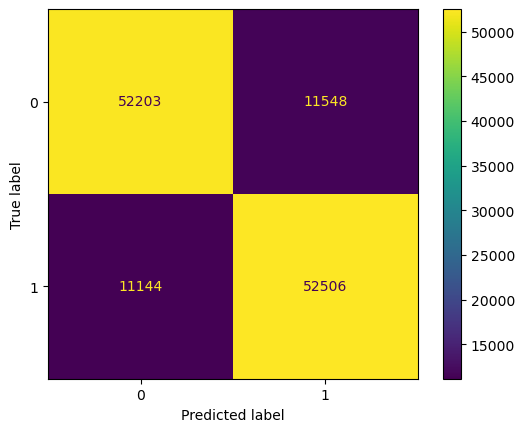

In [126]:
#confusion matrix on validation data

cmp = confusion_matrix(y_val,y_val_pred )
disp = ConfusionMatrixDisplay(cmp)
disp.plot()

In [127]:
# precision and recall
print('Precision score on valdata ',precision_score(y_val, y_val_pred))
print('Recall score  on val data',recall_score(y_val, y_val_pred))

Precision score on valdata  0.8197146157929247
Recall score  on val data 0.8249175176747839


In [128]:
# f1score
print('F1_score', f1_score(y_val, y_val_pred))

F1_score 0.8223078368727683


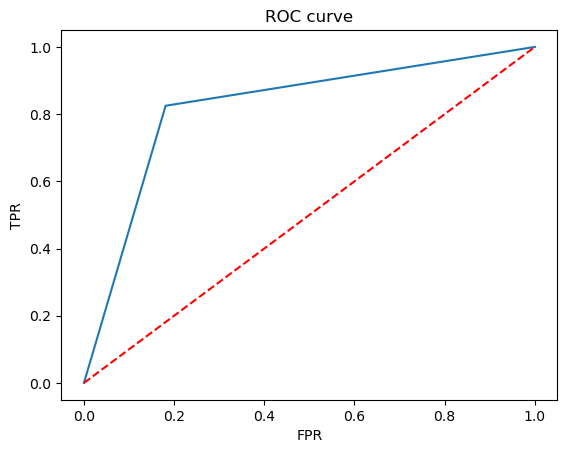

0.8218876305413652

In [129]:
# check ROC curve and AUROC value
fpr, tpr, th = roc_curve(y_val, y_val_pred)
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, '--',color = 'red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## AUROC score
roc_auc_score(y_val, y_val_pred)

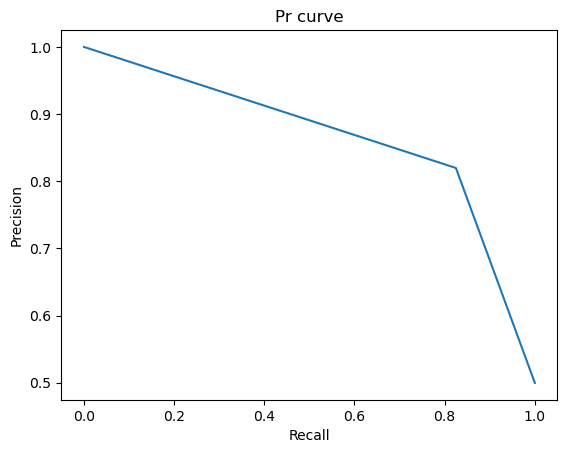

AUC score of PR curve : 0.8660519871740393


In [130]:
# Check PR curve and AU PR curve value
pr, rc, th = precision_recall_curve(y_val, y_val_pred)
plt.plot(rc,pr)
plt.title('Pr curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# AUC score of PR curve
print('AUC score of PR curve :',auc(rc, pr))

### Hyperparameter tuning to be done to get best f1 score

In [133]:
## grid search CV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

param_grid = {'C' : [0.001,0.01,1,5,10,15,20], 'penalty' : ['l2','l1']}

grid = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid, scoring = make_scorer(f1_score))
grid.fit(X_train, y_train)

C:\Users\trtej\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\trtej\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\trtej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\trtej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 5, 10, 15, 20],
                         'penalty': ['l2', 'l1']},
             scoring=make_scorer(f1_score))

In [134]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [135]:
# Define Logistic regression
model1 = LogisticRegression(penalty='l2',C=0.1)
model1.fit(X_train, y_train)

# accuracy on train
accuracy = model1.score(X_train, y_train)

# accuracy on val data
acc_val = model1.score(X_val, y_val)

# summary
print('accuracy on train', accuracy)
print('accuracy on val', acc_val)

# predict y
y_train_pred1 = model1.predict(X_train)
y_val_pred1 = model1.predict(X_val)

accuracy on train 0.8231637279860597
accuracy on val 0.8218773792984356


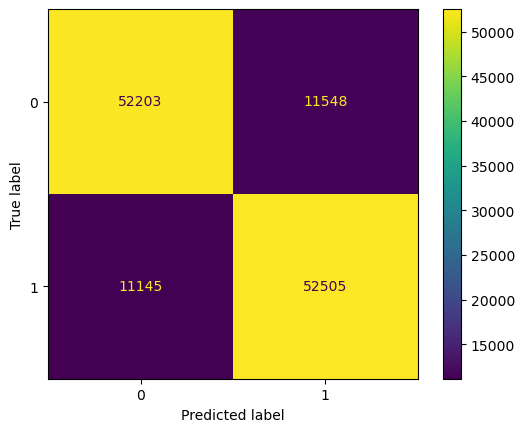

In [136]:
#confusion matrix on validation data

cmp = confusion_matrix(y_val,y_val_pred1 )
disp = ConfusionMatrixDisplay(cmp)
disp.plot()

In [137]:
# precision and recall
print('Precision score on valdata ',precision_score(y_val, y_val_pred1))
print('Recall score  on val data',recall_score(y_val, y_val_pred1))

# f1score
print('F1_score', f1_score(y_val, y_val_pred1))

Precision score on valdata  0.8197118011646605
Recall score  on val data 0.8249018067556952
F1_score 0.8222986147545476


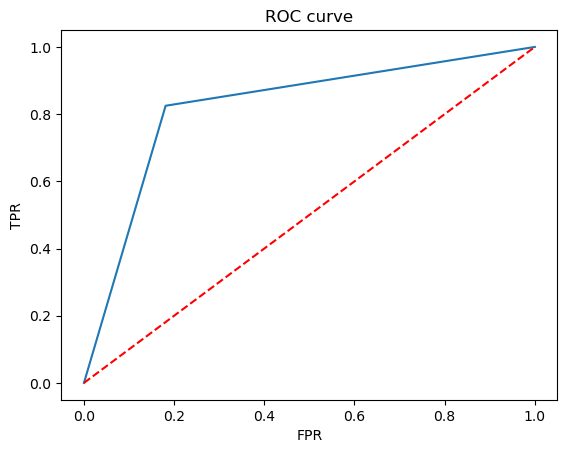

0.8218876305413652

In [138]:
# check ROC curve and AUROC value
fpr, tpr, th = roc_curve(y_val, y_val_pred1)
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, '--',color = 'red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## AUROC score
roc_auc_score(y_val, y_val_pred)

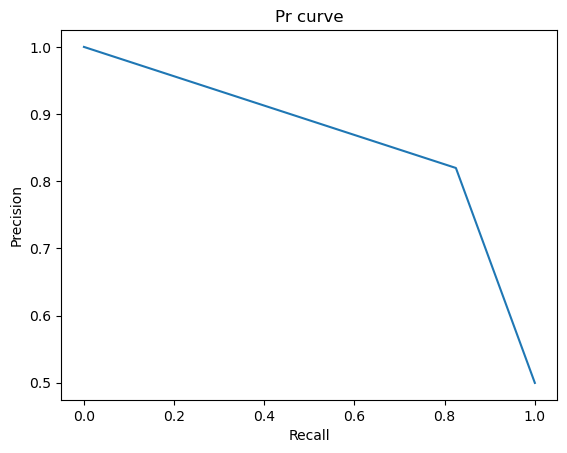

AUC score of PR curve : 0.8660466490163391


In [139]:
# Check PR curve and AU PR curve value
pr, rc, th = precision_recall_curve(y_val, y_val_pred1)
plt.plot(rc,pr)
plt.title('Pr curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# AUC score of PR curve
print('AUC score of PR curve :',auc(rc, pr))

In [158]:
# check on test data
X_test= X_test.drop(columns = ['installment', 'sub_grade','grade'])
X_test = scale.transform(X_test)

In [159]:
y_test_pred1 = model1.predict(X_test)

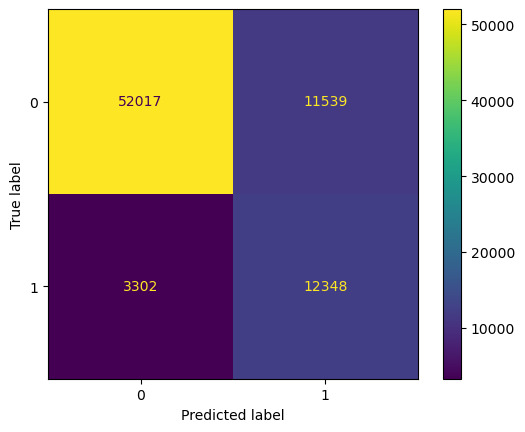

In [160]:
#confusion matrix on validation data

cmp = confusion_matrix(y_test,y_test_pred1 )
disp = ConfusionMatrixDisplay(cmp)
disp.plot()

In [161]:
# precision and recall
print('Precision score on valdata ',precision_score(y_test,y_test_pred1))
print('Recall score  on val data',recall_score(y_test,y_test_pred1))

# f1score
print('F1_score', f1_score(y_test,y_test_pred1))

Precision score on valdata  0.5169338970988404
Recall score  on val data 0.7890095846645367
F1_score 0.6246300933302982


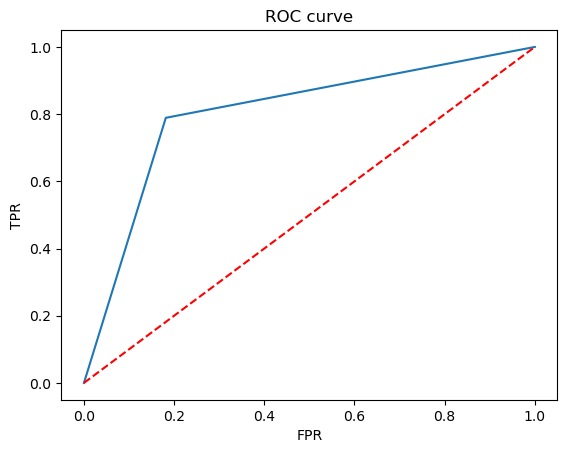

0.8218876305413652

In [243]:
# check ROC curve and AUROC value
fpr, tpr, th = roc_curve(y_test,y_test_pred1)
plt.plot(fpr, tpr)
plt.plot(fpr,fpr, '--',color = 'red')
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## AUROC score
roc_auc_score(y_val, y_val_pred)

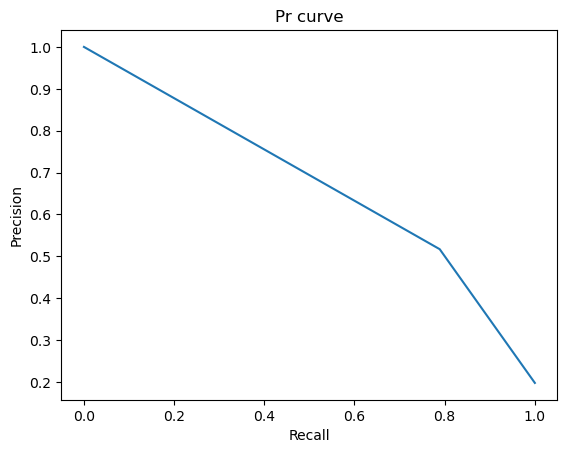

AUC score of PR curve : 0.6738161213579151


In [162]:
# Check PR curve and AU PR curve value
pr, rc, th = precision_recall_curve(y_test,y_test_pred1)
plt.plot(rc,pr)
plt.title('Pr curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# AUC score of PR curve
print('AUC score of PR curve :',auc(rc, pr))

## -------------------------------------------------------------------------------------------------

## Insights :
    - After reducing dimensions to 2 feature to view data. Data as more misclassification. Classification data is difficult.
    - Test F1 score is 0.67 which low and as per data this is possible.
    - Recall and precision should be balanced while dealing with banking domain. in R curve we can pick where precison is high and even recall is high. By above PR curve Precision can 0.65 and recall can be 0.68.
    -  - With removal of 'installment', 'sub_grade','grade' from data, VIF value got reduced below 5. So there are columns with very less multicolinearity between independent columns.

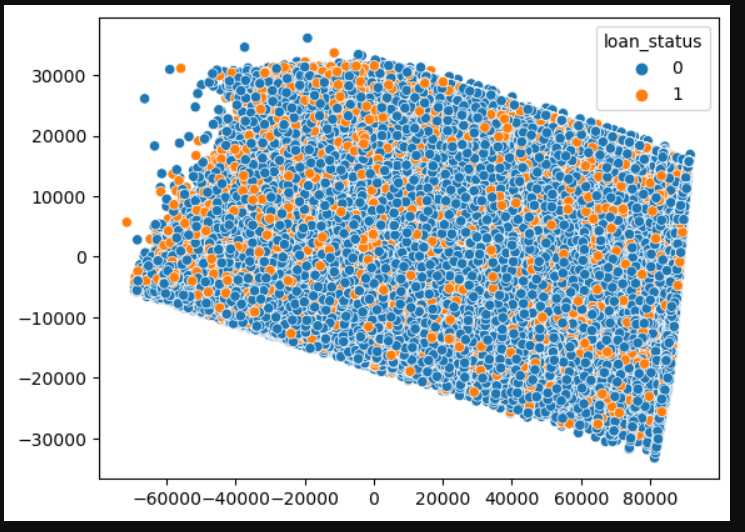

## Recommendations

 - As per weight data from model, emp_title, title, int_rate and term as high importance. So while providing loan to a person these feature should noted as priority.
 - With this distributino of data, KNN algorithm can be used, as KNN is non parametric model.

## Questionnaire  
 
 - What percentage of customers have fully paid their Loan Amount? -> 80% of customers fully paid loan.
 - Comment about the correlation between Loan Amount and Installment features. -> 0.042407, very less correlated.
 - The majority of people have home ownership as _______.-> MORTGAGE as house ownership for majority of people.
 - People with grades ‘A’ are more likely to fully pay their loan. (T/F) -> F, B grade people are more likely pay loans.
 - Name the top 2 afforded job titles. -> Teacher of about 4389 counts.
 - Thinking from a bank's perspective, which metric should our primary focus be on.. -> F1 score
         (ROC AUC, Precision, Recall, F1 Score )
 - How does the gap in precision and recall affect the bank? Precision and recall should be balanace. If gap between precision an recall is more then either False positive is more or false negative is more. In bank looses revenue if person who can repay loan but misclassified as defaulter and viceversa.
 - Which were the features that heavily affected the outcome? -> emp_title and title as primary focus
 - Will the results be affected by geographical location? (Yes/No) yes, in metro cities expenses increase when compared non metro cities. So loan amount requirement is more in metro cities.



In [245]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [241]:
a = pd.DataFrame(X_res.columns)
b = pd.DataFrame(model1.coef_.T).rename(columns = {0:'values'})
c = pd.concat([a,b],  axis = 1)
c.sort_values(by = 'values', ascending = False)

,0,values
20,emp_title,1.639037
21,title,0.563966
2,int_rate,0.421393
1,term,0.272908
12,revol_util,0.216163
8,dti,0.162070
9,open_acc,0.161318
4,home_ownership,0.143101
0,loan_amnt,0.115683
5,annual_inc,0.087177


In [202]:
type(model1.coef_)

numpy.ndarray

In [191]:
X_train.shape

(382201, 22)

In [190]:
model1.coef_.shape

(1, 22)

In [174]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [171]:
df.groupby(['grade'])['loan_status'].count().reset_index().sort_values(by= 'loan_status', ascending = False)

,grade,loan_status
1,B,116018
2,C,105987
0,A,64187
3,D,63524
4,E,31488
5,F,11772
6,G,3054
